Problem I

100  samples:  0.44
250  samples:  0.472
500  samples:  0.486
1000  samples:  0.47


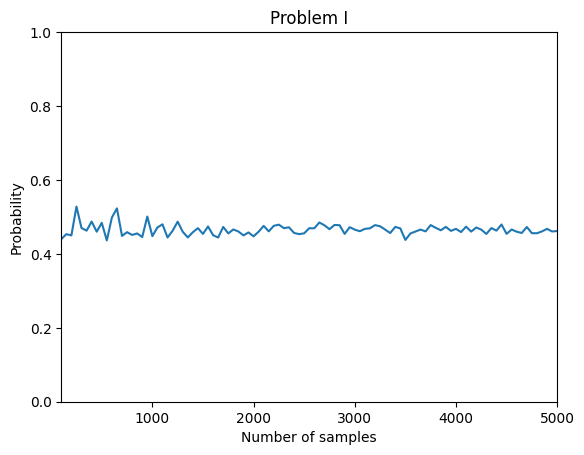

In [152]:
import random
import matplotlib.pyplot as plt

def prob (samples):
    n = 0
    for i in range (samples):
        x = random.random ()
        y = random.random ()
        z = x/y
        if (abs(int(z) - z) <= abs(int(z) + 1 - z)):
            closestInt = int(z)
        else:
            closestInt = int(z) + 1
        if (closestInt % 2 == 0):
            n += 1
    return n/samples

sampleList1 = [100, 250, 500, 1000]
for i in range (4):
    print (sampleList1[i], " samples: ", prob (sampleList1[i]))

sampleList = list (range(50, 5001, 50))
resultProbList = []
for i in range (len(sampleList)):
    resultProbList.append (prob (sampleList[i]))

plt.plot (sampleList, resultProbList)
plt.xlabel ('Number of samples')
plt.xlim (100, 5001)
plt.ylabel ('Probability')
plt.ylim (0, 1)
plt.title ('Problem I')
plt.show ()

Problem II: Coin flip

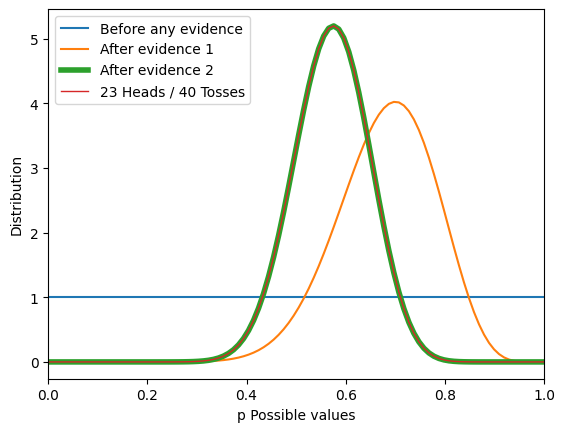

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

p = np.linspace (0, 1, 100)
ditsOfp = [] * 100

# Before any evidence: uniform distribution for p
alpha_par = 1
beta_par = 1
ditsOfp = beta.pdf (p, alpha_par, beta_par)
plt.plot (p, ditsOfp, label = 'Before any evidence')
plt.xlim (0, 1)
plt.xlabel ('p Possible values')
plt.ylabel ('Distribution')

# After evidence 1: 14 Heads / 20 Tosses
alpha_par += 14
beta_par += 6
ditsOfp = beta.pdf (p, alpha_par, beta_par)
plt.plot (p, ditsOfp, label = 'After evidence 1')

# After evidence 2: 23 Heads / 40 Tosses
alpha_par += 9
beta_par += 11
ditsOfp = beta.pdf (p, alpha_par, beta_par)
plt.plot (p, ditsOfp, label = 'After evidence 2',  linewidth = 4)

# 23 / 40 = evidence 1
alpha_par = 24
beta_par = 18
ditsOfp = beta.pdf (p, alpha_par, beta_par)
plt.plot (p, ditsOfp, label = '23 Heads / 40 Tosses', linewidth = 1)

plt.legend()
plt.show()

Problem II: Dice

Best estimatied x & y are:  0.2  &  0.5


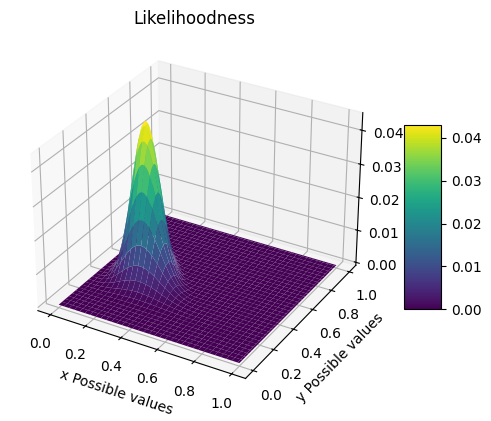

Best estimatied x & y are:  0.33  &  0.5


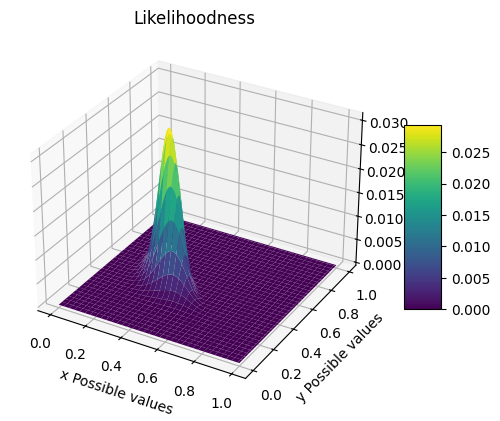

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math as m

x = np.linspace (0, 1, 101)
y = np.linspace (0, 1, 101)
likeXY = [[0] * 101 for _ in range(101)]

# After evidence A * 4, B * 10, C * 6 in 20 tosses
maxlike = 0
for i in range (1, 99):
    for j in range (1, 99 - i):
        pA = x[i]
        pB = y[j]
        pC = 1 - (x[i] + y[j])
        logLike = (m.log (m.comb(20, 4)) + 4 * m.log (pA) +
                   m.log (m.comb(16, 10)) + 10 * m.log (pB) + 
                   m.log (m.comb(6, 6)) + 6 * m.log (pC)
                )
        likeXY[i][j] = m.exp(logLike)
        if (likeXY[i][j] > maxlike):
            maxlike = likeXY[i][j]
            xmax = pA
            ymax = pB
print ("Best estimatied x & y are: ", xmax, ' & ', ymax)

# I Searched how to plot the graph.
likeXY = np.array(likeXY)
Y, X = np.meshgrid(y, x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, likeXY, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel ('x Possible values')
plt.ylabel ('y Possible values')
plt.title ('Likelihoodness')
plt.show()

# After evidence A * 10, B * 15, C * 5 in 30 tosses
maxlike = 0
likeXY = [[0] * 101 for _ in range(101)]
for i in range (1, 99):
    for j in range (1, 99 - i):
        pA = x[i]
        pB = y[j]
        pC = 1 - (x[i] + y[j])
        logLike = (m.log (m.comb(30, 10)) + 10 * m.log (pA) +
                   m.log (m.comb(20, 15)) + 15 * m.log (pB) + 
                   m.log (m.comb(5, 5)) + 5 * m.log (pC)
                )
        likeXY[i][j] = m.exp(logLike)
        if (likeXY[i][j] > maxlike):
            maxlike = likeXY[i][j]
            xmax = pA
            ymax = pB
print ("Best estimatied x & y are: ", xmax, ' & ', ymax)

# I Searched how to plot the graph.
likeXY = np.array(likeXY)
Y, X = np.meshgrid(y, x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, likeXY, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel ('x Possible values')
plt.ylabel ('y Possible values')
plt.title ('Likelihoodness')
plt.show()

Problem III

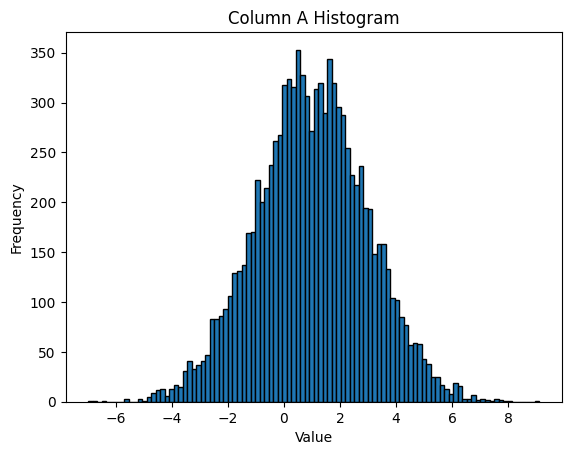

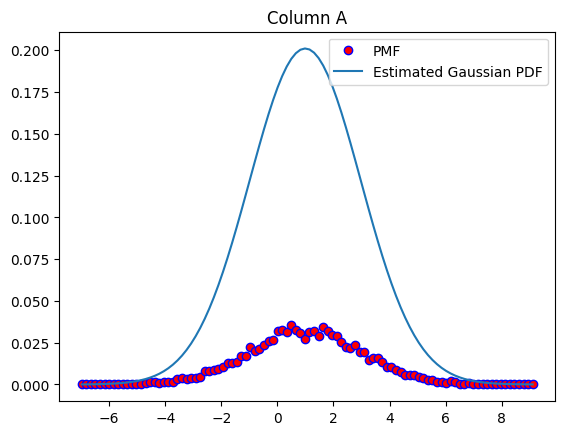

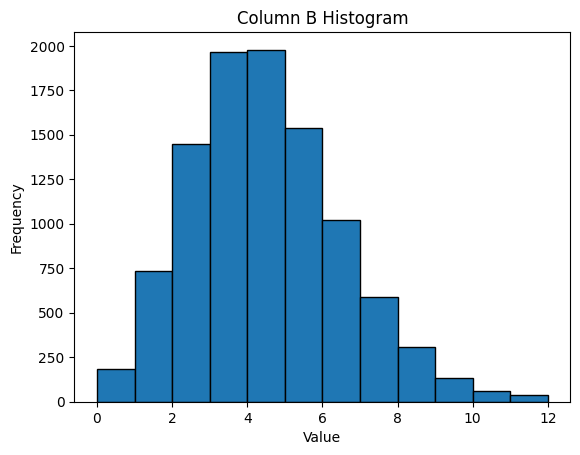

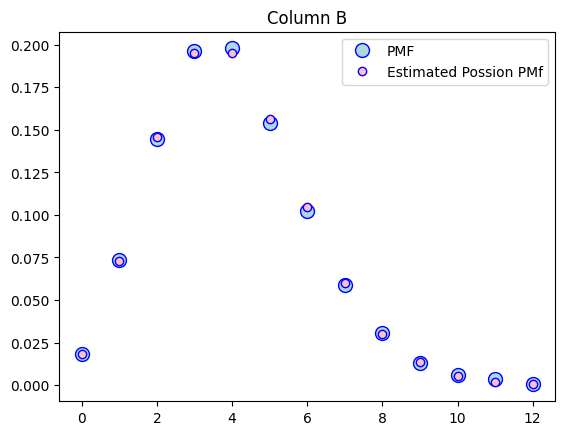

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

data = pd.read_excel ("testdata.xlsx", header = None)
data.columns = ['A', 'B']

counterA, EdgesA = np.histogram (data.A, bins = 100)
plt.hist (data.A, bins = 100, edgecolor = 'black')
plt.title ('Column A Histogram') 
plt.xlabel ('Value') 
plt.ylabel ('Frequency')
plt.show()
# EdgesA[1] - EdgesA[0] < 0.2
# Gaussian Distribution
probA = []
x = np.linspace (min(data.A), max(data.A), 100)
for i in range (100):
    probA.append (counterA[i]/10000)
plt.plot (x, probA, 'o', color = 'blue', markerfacecolor = 'red', label = 'PMF')
plt.title ('Column A')
# Estimation:
mean = 0
sigma2 = 0
for i in range (10000):
    mean += data.A[i]
mean /= 10000
for i in range (10000):
    sigma2 += (data.A[i] - mean) ** 2
sigma2 /= 9999
pdfA = np.exp(-((x - mean)**2) / (2 * sigma2)) / (np.sqrt(2 * np.pi * sigma2))
plt.plot (x, pdfA, label = 'Estimated Gaussian PDF')
plt.legend()
plt.show()

counterB, EdgesB = np.histogram (data.B, bins = 13)
plt.hist (data.B, bins = 12, edgecolor = 'black')
plt.title ('Column B Histogram') 
plt.xlabel ('Value') 
plt.ylabel ('Frequency')
plt.show()
# Poisson Distribution
probB = []
x = list (range(0, 13))
for i in range (13):
    probB.append (counterB[i]/10000)
plt.plot (x, probB, 'o', color = 'blue', markerfacecolor = 'lightblue', markersize = 10, label = 'PMF')
plt.title ('Column B PMF') 
# Estimation:
landa = 0
for i in range (13):
    landa += x[i] * probB[i]
kValues = np.arange(0, 13)
pmfB = poisson.pmf (kValues, mu = landa)
plt.plot (x, pmfB, 'o', color = 'blue', markerfacecolor = 'pink', label = 'Estimated Possion PMf')
plt.title ('Column B') 
plt.legend()
plt.show()